In [450]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier as KNN
%matplotlib inline

In [451]:
cd F:\

F:\


In [452]:
# Reading the file
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [453]:
df.shape

(891, 12)

In [454]:
df.columns    

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [455]:
# Variable Identification
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [456]:
# or you can use info() method
df.info()    # Name,Sex,Ticket,Cabin and Embarked are categorical variables els are continuous 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [457]:
# Univariate Analysis 
# Continuous Varaible
df.describe()   # Describe method shows only continuous variables

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 0, 'Age')

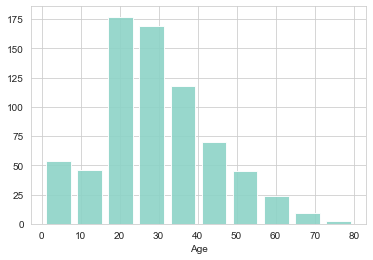

In [458]:
# Note:-Frequency table is used for categorical - categorical variables; scatter plot is used for continuous – continuous variables; and histogram is used to plot single variable.
plt.hist(df['Age'],alpha=0.9, rwidth=0.8)
plt.xlabel('Age')     # This is a bit right-skewed

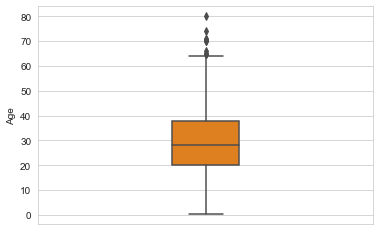

In [459]:
sns.boxplot(y=df['Age'],data=df,width=.2,palette='autumn')   # There are a few points lying outside the max value 

Text(0.5, 0, 'Fare')

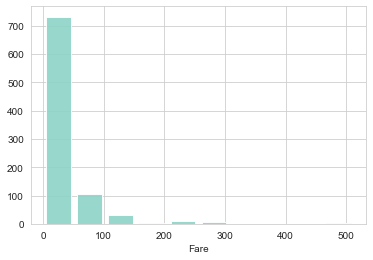

In [460]:
plt.hist(df['Fare'],alpha=0.9, rwidth=0.8)
plt.xlabel('Fare')

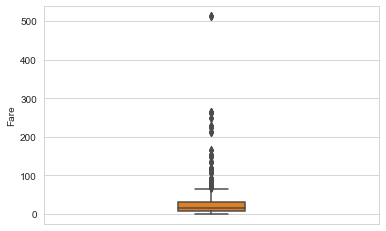

In [461]:
sns.boxplot(y=df['Fare'],data=df,width=.2,palette='autumn')   # There are many points lying outside the max range

In [462]:
# Categrical Variable
df['Sex'].value_counts()/len(df['Sex'])*100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

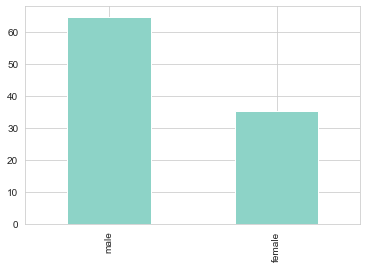

In [463]:
(df['Sex'].value_counts()/len(df['Sex'])*100).plot.bar()   # Frequency Chart

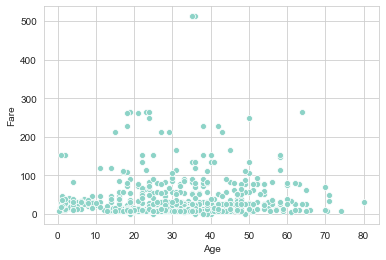

In [464]:
# Bivariate Analysis
# Continuous-Continuous Variable
sns.scatterplot(x='Age',y='Fare',data=df,legend='brief')   # There are two points present above 500 mark

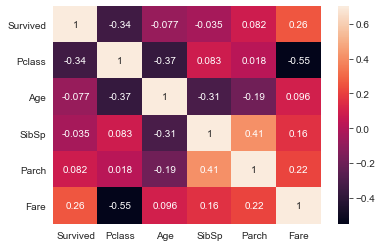

In [465]:
# Checking correlation bw different variables
sns.heatmap(df.drop('PassengerId',axis=1).corr(),vmax=.7,cbar=True,annot=True)

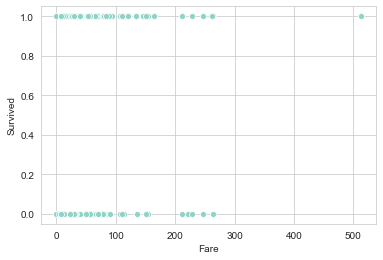

In [466]:
sns.set_style(style='whitegrid')
sns.scatterplot(x='Fare',y='Survived',data=df)

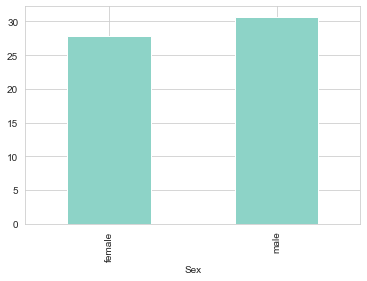

In [467]:
# Categorical -Continuous Bivariate Analysis
df.groupby('Sex')['Age'].mean().plot.bar()

In [468]:
# But there could be sample indifferences so we perform a ttest to or know if the mean age of both male and female are statistically different or not
males=df[df['Sex']=='male']
females=df[df['Sex']=='female']
stats.ttest_ind(males['Age'],females['Age'],nan_policy='omit') # nan policy is to ignore missing values
# For the two groups to be statistically diiferent pvalue should be < 0.05

Ttest_indResult(statistic=2.499206354920835, pvalue=0.012671296797014266)

In [469]:
# Categorical -Categorical Bivariate Analysis
# Now we want to know the relationship b/w gender and survival rate,so,we make a two-way table
pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [470]:
# This doesn't tell us the whole story so we perform chi-square test
stats.chi2_contingency(pd.crosstab(df['Sex'],df['Survived']))  # First value is chi-square statistic and second is the p-value which is less than 0.05

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

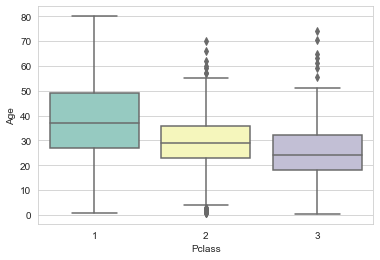

In [471]:
sns.boxplot(data=df, y='Age', x='Pclass')

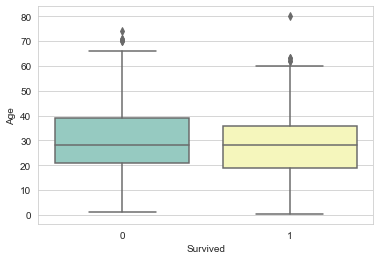

In [472]:
sns.boxplot(data=df, y='Age', x='Survived')

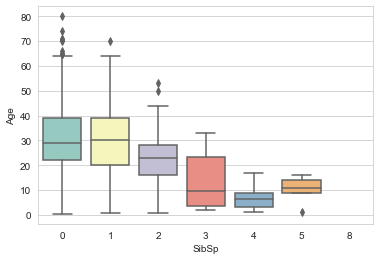

In [473]:
sns.boxplot(data=df, y='Age', x='SibSp')

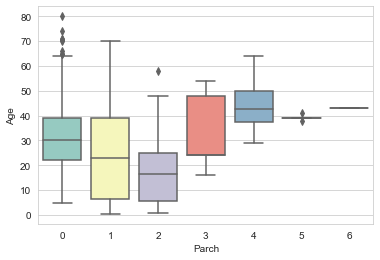

In [474]:
sns.boxplot(data=df, y='Age', x='Parch')

In [475]:
# Trating Missing Values
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [476]:
# Deletion of rows and columns for this much missing values might not be useful,so ,we can impute them with mean of their column
df['Age']=df['Age'].fillna(df['Age'].mean())

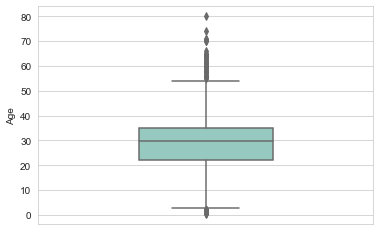

In [477]:
# Outlier Detection
# Univariate Outlier Detection
sns.boxplot(y='Age',data=df,width=.4)

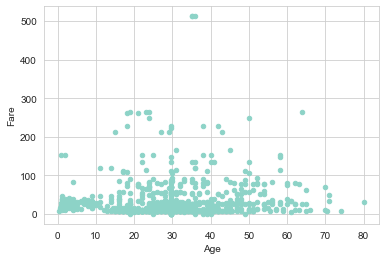

In [478]:
# Bivariate Outlier Detection
df.plot.scatter('Age','Fare')

In [479]:
# Removing outliers from dataset
df = df.drop(df[(df['Fare']>400) & (df['Age']>30)].index)

In [480]:
df = df.drop(df[(df['Fare']>500) & (df['Survived']>0.8)].index)   # Dropping that person who gave more than 500 bucks as fare

In [481]:
df = df.drop(df[(df['Age']>79) & (df['Survived']>0.8)].index)  # Dropping that 80 year old person

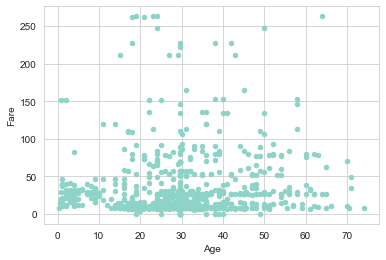

In [482]:
df.plot.scatter('Age','Fare')     # This is better than the previous scatter plot

0.3956860611315026

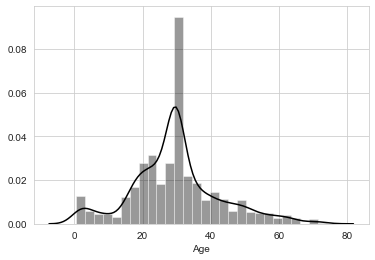

In [483]:
# Variable Transformation
sns.distplot(df['Age'],color='Black')
df['Age'].skew()   # This is not a normal distribution

-2.6862621666007303

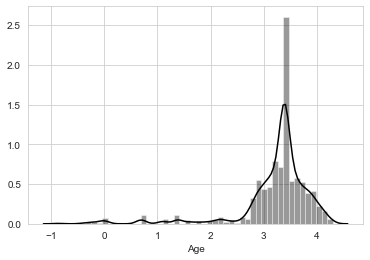

In [484]:
sns.distplot(np.log(df['Age']),color='Black')
np.log(df['Age']).skew()

-0.8450092125973371

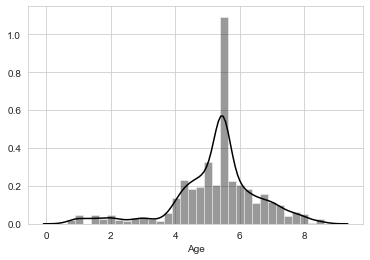

In [485]:
sns.distplot(np.sqrt(df['Age']),color='Black')
np.sqrt(df['Age']).skew()

-1.3895977095272627

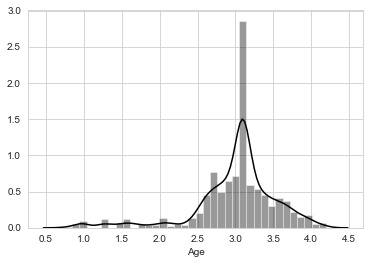

In [486]:
sns.distplot(np.power(df['Age'],1/3),color='Black')
np.power(df['Age'],1/3).skew()

In [487]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         2
dtype: int64

In [488]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',
       'C90', 'C45', 

In [489]:
df['Cabin'].fillna(value="NA",inplace=True) #Filling Cabin

In [490]:
def take_section(code):
    return code[0]
df['Cabin']=df['Cabin'].apply(take_section)

In [491]:
df['Cabin'].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [492]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [493]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  #Filling Embarked

In [494]:
df.dropna(subset=['Age'],axis=0,inplace=True)     # Treating a single missing entry which i don't know what it is so i dropped that whole row
df.reset_index(drop=True,inplace=True)            # Resetting index

In [495]:
df=df.drop(['PassengerId'],axis=1)

In [496]:
df=df.drop(['Name'],axis=1)

In [497]:
df=df.drop(['Ticket'],axis=1)

In [498]:
df['Pclass']=df['Pclass'].astype('object')

In [499]:
df['Parch']=df['Parch'].astype('object')

In [500]:
df['SibSp']=df['SibSp'].astype('object')

In [501]:
df['Cabin'].value_counts()

N    686
C     59
B     45
D     33
E     32
A     14
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [502]:
# Grouping cabins based on class
def group_cabin(code):
    if code in ['D','E','F','G','A','C','B','T']:
        return "OTHER"
    elif code in ["N"]:
        return "N"
    else:
        return code
    
df['Cabin'] = df['Cabin'].apply(group_cabin)

In [503]:
# Shuffle the dataset
df=shuffle(df,random_state=42)
# Creating 4 divisions
div=int(df.shape[0]/4)
# 3 parts to train and 1 for testing
train_df=df.loc[:3*div+1,:]
test_df=df.loc[3*div+1:]

train_df.shape,test_df.shape

((618, 9), (270, 9))

In [504]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
296,0,1,female,2.0,1,2,151.5500,OTHER,S
682,0,2,male,25.0,1,2,41.5792,N,C
535,0,1,male,45.0,0,0,26.5500,OTHER,S
644,0,3,male,19.0,0,0,7.8958,N,S
623,0,3,male,21.0,0,0,16.1000,N,S


In [505]:
test_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
664,0,2,male,25.0,0,0,13.0000,N,S
571,1,1,male,36.0,0,0,26.3875,OTHER,S
633,1,2,female,28.0,0,0,13.0000,N,S
742,0,3,male,16.0,1,1,20.2500,N,S
262,0,1,male,40.0,0,0,0.0000,OTHER,S


In [506]:
# Simple Mode
test_df['simple_mode']=train_df['Survived'].mode()[0]
test_df['simple_mode'].head()

664    0
571    0
633    0
742    0
262    0
Name: simple_mode, dtype: int64

In [507]:
simple_mode_accuracy=accuracy_score(test_df['Survived'],test_df['simple_mode'])
simple_mode_accuracy

0.662962962962963

In [508]:
# Mode based on Gender
gender_mode=pd.crosstab(train_df['Survived'],train_df['Sex'])
gender_mode

Sex,female,male
Survived,,
0,48,323
1,174,73


In [509]:
test_df['gender_mode']=test_df['Survived']

# For every unique value in column
for i in test_df['Sex'].unique():
    # Calculate and assign mode to new column,corresponding to unique values in 'Sex'
    test_df['gender_mode'][test_df['Sex']==str(i)]=train_df['Survived'][train_df['Sex']==str(i)].mode()[0]

In [510]:
gender_accuracy=accuracy_score(test_df['Survived'],test_df['gender_mode'])
gender_accuracy   # There is a boost in accuracy when we used mode using gender values

0.7555555555555555

In [511]:
# Mode based on Pclass
class_mode=pd.crosstab(train_df['Survived'],train_df['Pclass'])
class_mode

Pclass,1,2,3
Survived,,,
0,53,68,250
1,99,63,85


In [512]:
test_df['class_mode']=test_df['Survived']

# For every unique value in column
for i in test_df['Pclass'].unique():
    # Calculate and assign mode to new column,corresponding to unique values in 'Pclass'
    test_df['class_mode'][test_df['Pclass']==i]=train_df['Survived'][train_df['Pclass']==i].mode()[0]

In [513]:
class_accuracy=accuracy_score(test_df['Survived'],test_df['class_mode'])
class_accuracy   # That is a lower accuracy score than mode based on gender

0.6851851851851852

In [514]:
from sklearn.metrics import confusion_matrix

In [515]:
# Evaluation Metrics
# 1. Confusion Matrix
conf = confusion_matrix(test_df['Survived'],test_df['gender_mode'])
print('                 Confusion matrix')
print('                 Score positive    Score negative')
print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])

Confusion matrix
                 Score positive    Score negative
Actual positive       146                33
Actual negative        33                58


In [516]:
# 2. Accuracy
print('Accuracy  %0.2f' % accuracy_score(test_df['Survived'],test_df['gender_mode']))

Accuracy  0.76


In [517]:
from sklearn.metrics import precision_recall_fscore_support

In [518]:
# 3. Precision and Recall
metrics = precision_recall_fscore_support(test_df['Survived'],test_df['gender_mode'])
print(' ')
print('           Positive      Negative')
print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])



           Positive      Negative
Num case      179            91
Precision    0.82          0.64
Recall       0.82          0.64
F1           0.82          0.64


In [519]:
# Converting all categorical variables into continuous variables as knn can't work with categorical variables
df=pd.get_dummies(df)
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Cabin_N,Cabin_OTHER,Embarked_C,Embarked_Q,Embarked_S
296,0,2.0,151.5500,1,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,1
682,0,25.0,41.5792,0,1,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
535,0,45.0,26.5500,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
644,0,19.0,7.8958,0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
623,0,21.0,16.1000,0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1


In [520]:
df.to_csv('prepared_data.csv',index=False,header=True)

In [521]:
import warnings
warnings.filterwarnings("ignore")

In [522]:
data = pd.read_csv('prepared_data.csv')
data.shape

(887, 27)

In [523]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Cabin_N,Cabin_OTHER,Embarked_C,Embarked_Q,Embarked_S
0,0,2.0,151.5500,1,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,1
1,0,25.0,41.5792,0,1,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
2,0,45.0,26.5500,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,19.0,7.8958,0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0,21.0,16.1000,0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1


In [524]:
#seperating independent and dependent variables
x = data.drop(['Survived'], axis=1)
y = data['Survived']
x.shape, y.shape

((887, 26), (887,))

In [525]:
# Scaling Features
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [526]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [527]:
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Cabin_N,Cabin_OTHER,Embarked_C,Embarked_Q,Embarked_S
0,0.021473,0.576236,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.334058,0.158096,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.605871,0.100951,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.252514,0.030022,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.279696,0.061217,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [528]:
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 19, stratify=y)
train_x.shape,train_y.shape

((665, 26), (665,))

In [529]:
# Creating instance of KNN
clf = KNN(n_neighbors = 10)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Test Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Test F1 Score     0.6842105263157895


In [530]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [531]:
#Defining K range
k = range(6, 40, 2)

In [532]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

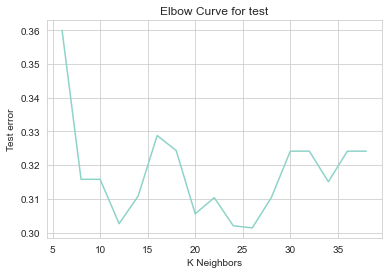

In [533]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [534]:
# Creating instance of KNN
clf = KNN(n_neighbors = 1)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Test Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Test F1 Score     0.6190476190476191


In [535]:
# Visualizing Overfitting and Underfitting
clf = KNN(n_neighbors = 3)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
train_predict = clf.predict(train_x)
k = f1_score(train_predict, train_y)
print('Train F1 Score    ', k )

# Predicting over the Test Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Train F1 Score     0.8377823408624231
Test F1 Score     0.6309523809523809


In [536]:
def F1_SCORE(k):

    train_f1=[]
    test_f1=[]

    for i in k:
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)

        # Predicting over the Train Set and calculating F1
        tmp = clf.predict(train_x)
        tmp = f1_score(tmp, train_y)
        train_f1.append(tmp)

        # Predicting over the Test Set and calculating F1
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp, test_y)
        test_f1.append(tmp)
    return train_f1,test_f1

# Defining k range
k=range(1,150)

# Calling above defined function
train_f1,test_f1=F1_SCORE(k)

In [537]:
scores=pd.DataFrame({'train_score':train_f1,'test_score':test_f1},index=k)
scores

,train_score,test_score
1,0.986028,0.619048
2,0.842825,0.590604
3,0.837782,0.630952
4,0.792952,0.625000
5,0.799197,0.654545
...,...,...
145,0.605598,0.589147
146,0.587629,0.598425
147,0.596939,0.593750
148,0.596939,0.593750


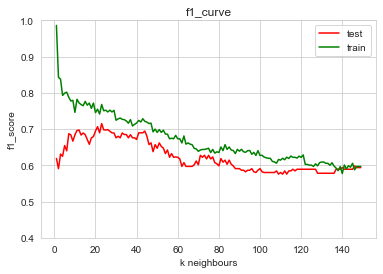

In [538]:
# From this we can't make a decison
# Visualizing
plt.plot(k,test_f1,color='red',label='test')
plt.plot(k,train_f1,color='green',label='train')
plt.xlabel('k neighbours')
plt.ylabel('f1_score')
plt.title('f1_curve')
plt.ylim(.4,1)
plt.legend()

In [539]:
# Now the test data that we are using here is not completely unseen.So,we try a different set
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 25, stratify=y)
train_x.shape,train_y.shape

((665, 26), (665,))

In [540]:
train_f1,test_f1=F1_SCORE(k)

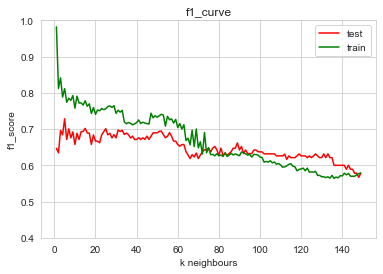

In [541]:
plt.plot(k,test_f1,color='red',label='test')
plt.plot(k,train_f1,color='green',label='train')
plt.xlabel('k neighbours')
plt.ylabel('f1_score')
plt.title('f1_curve')
plt.ylim(.4,1)
plt.legend()

In [542]:
# This is different from the graph shown above because the set of data is changed now.So,how can we test the value of k for best model without using the test data.
# Validation
# 1. Hold-out Validation
# 2. Stratified Hold-out Validation
train1_x,test_x,train1_y,test_y=train_test_split(x,y,test_size=.2,random_state=121,stratify=y)

In [543]:
train_x,val_x,train_y,val_y=train_test_split(train1_x,train1_y,test_size=.2,random_state=52,stratify=train1_y) # Stratify is set to the target data t get equal portion of both the classes in all sets of data
print('Training data    ',train_x.shape,train_y.shape)
print('Validation data  ',val_x.shape,val_y.shape)
print('Test data        ',test_x.shape,test_y.shape)

Training data     (567, 26) (567,)
Validation data   (142, 26) (142,)
Test data         (178, 26) (178,)


In [544]:
print(train_y.value_counts()/len(train_y))
print(val_y.value_counts()/len(val_y))
print(test_y.value_counts()/len(test_y))

0    0.619048
1    0.380952
Name: Survived, dtype: float64
0    0.619718
1    0.380282
Name: Survived, dtype: float64
0    0.617978
1    0.382022
Name: Survived, dtype: float64


In [545]:
# 3. K-fold Validation
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=62,stratify=y)

In [546]:
from sklearn.model_selection import cross_val_score

In [547]:
score=cross_val_score(KNN(n_neighbors=1),X=train_x,y=train_y,cv=10)
score

array([0.76119403, 0.79104478, 0.65671642, 0.74626866, 0.82089552,
       0.84848485, 0.6969697 , 0.83333333, 0.68181818, 0.72727273])

In [548]:
# Consistency using mean and satndard deviation in percentage
score.mean()*100,score.std()*100

(75.63998190863862, 6.305833801619953)

In [549]:
# Now this is the value when n_neighbours is set to 1
# So,automating the process of cross-val score using  different value of K-neighbours
def val_score(n_neighbours):
    avg=[]
    std=[]
    for i in n_neighbours:
        score=cross_val_score(KNN(n_neighbors=i),X=train_x,y=train_y,cv=10)
        avg.append(score.mean())
        std.append(score.std())
    return avg,std

n_neighbours=range(1,150)
mean,std=val_score(n_neighbours)

Text(0.5, 1.0, 'Mean Validation Score')

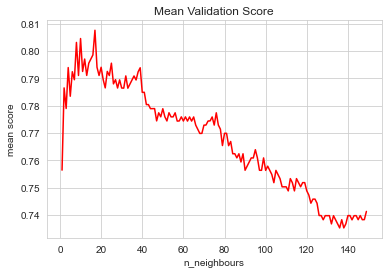

In [550]:
# Plotting mean validation score for each k-value
plt.plot(n_neighbours,mean,color='red',label='mean')
plt.xlabel('n_neighbours')
plt.ylabel('mean score')
plt.title('Mean Validation Score')   

Text(0.5, 1.0, 'Standard Deviation Validation Score')

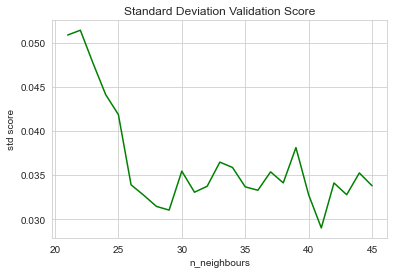

In [554]:
# Plotting standard deviation validation score for each k-value
plt.plot(n_neighbours[20:45],std[20:45],color='green',label='standard deviation')
plt.xlabel('n_neighbours')
plt.ylabel('std score')
plt.title('Standard Deviation Validation Score')   

In [555]:
clf=KNN(n_neighbors=41)
clf.fit(train_x,train_y)

score1=clf.score(train_x,train_y)
score=clf.score(test_x,test_y)
score1,score

(0.8015037593984963, 0.7972972972972973)